In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
from surprise import Dataset, Reader, SVD, KNNBasic
from surprise.model_selection import cross_validate

pd.set_option('display.max_columns',None)

1. Read data from “ratings.csv” with line format: 'userID movieID rating timestamp'. 

In [2]:
credits=pd.read_csv('./data/credits.csv')
keywords = pd.read_csv('./data/keywords.csv')
links = pd.read_csv('./data/links_small.csv')
movies=pd.read_csv('./data/movies_metadata.csv')
ratings = pd.read_csv('./data/ratings_small.csv')

C:\Users\Tyler\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py:3147: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
ratings

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
...,...,...,...,...
99999,671,6268,2.5,1065579370
100000,671,6269,4.0,1065149201
100001,671,6365,4.0,1070940363
100002,671,6385,2.5,1070979663


2. MAE and RMSE are two famous metrics for evaluating the performances of a recommender system. 
<br/> The definition of MAE can be found via: https://en.wikipedia.org/wiki/Mean_absolute_error.
<br/> The definition of RMSE can be found via: https://en.wikipedia.org/wiki/Root-mean-square_deviation. 

3. Compute the average MAE and RMSE of the 
<br/> Probabilistic Matrix Factorization (PMF), 
<br/> User based Collaborative Filtering, 
<br/> Item based Collaborative Filtering,
under the 5-folds cross-validation
> conda install -c conda-forge scikit-surprise

In [5]:
reader = Reader()
data = Dataset.load_from_df(ratings[['userId','movieId','rating']], reader)

# (1) Probabilistic Matrix Factorization (PMF)
svd = SVD(biased=False)  # Use SVD algorithm

# 5-fold cross-validation
pmf_result = cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

# (2) User based Collaborative Filtering
u_cf = KNNBasic(sim_options = {'user_based': False })
u_cf_result = cross_validate(u_cf, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

# (3) Item based Collaborative Filtering
i_cf = KNNBasic(sim_options = {'user_based': False})
i_cf_result = cross_validate(i_cf, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0093  1.0051  1.0174  1.0170  1.0030  1.0104  0.0059  
MAE (testset)     0.7797  0.7779  0.7838  0.7855  0.7760  0.7806  0.0036  
Fit time          3.29    3.33    3.40    3.34    3.32    3.34    0.04    
Test time         0.13    0.09    0.09    0.13    0.13    0.11    0.02    
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9289  0.9293  0.9433  0.9309  0.9359  0.9337  0.0054

4. Compare the average (mean) performances of User-based collaborative filtering, item-based collaborative filtering, PMF with respect to RMSE and MAE. Which ML model is the best in the movie rating data?
> The less mean error that the model has, the better performance that the model has, so collaborative filtering models is better than PMF, however, the result of user based collaborative filtering model and item collaborative filtering model is slightly different, it’s hard to tell which one is better on this situation.

In [36]:
rmse = [pmf_result['test_rmse'].mean(), u_cf_result['test_rmse'].mean(), i_cf_result['test_rmse'].mean()]
mae = [pmf_result['test_mae'].mean(), u_cf_result['test_mae'].mean(), i_cf_result['test_mae'].mean()]

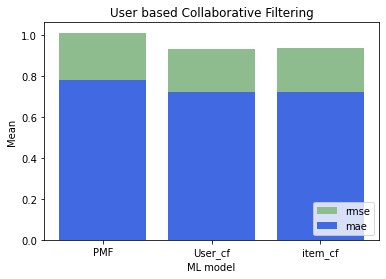

In [42]:
name = ['PMF', 'User_cf', 'item_cf']

plt.bar(name, rmse, label="rmse", color='darkseagreen')
plt.bar(name, mae, label="mae",color='royalblue')

plt.title('User based Collaborative Filtering')
plt.xlabel('ML model')
plt.ylabel('Mean')
plt.legend(loc='lower right', fontsize=10)
plt.show()

5. Examine how the cosine, MSD (Mean Squared Difference), and Pearson similarities impact the performances of User based Collaborative Filtering and Item based Collaborative Filtering. Plot your results. Is the impact of the three metrics on User based Collaborative Filtering consistent with the impact of the three metrics on Item based Collaborative Filtering?

In [6]:
# cosine -- User based Collaborative Filtering
cu = KNNBasic(sim_options = {'name':'cosine','user_based': True})
cu_result = cross_validate(cu, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

# cosine -- Item based Collaborative Filtering
ci = KNNBasic(sim_options = {'name':'cosine','user_based': False})
ci_result =cross_validate(ci, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

# MSD -- User based Collaborative Filtering
mu = KNNBasic(sim_options = {'name':'MSD','user_based': True})
mu_result = cross_validate(mu, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

# MSD -- Item based Collaborative Filtering
mi = KNNBasic(sim_options = {'name':'MSD','user_based': False})
mi_result = cross_validate(mi, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

# Pearson similarities -- User based Collaborative Filtering
pu = KNNBasic(sim_options = {'name':'pearson','user_based': True})
pu_result = cross_validate(pu, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

# Pearson similarities -- Item based Collaborative Filtering
pi = KNNBasic(sim_options = {'name':'pearson','user_based': False})
pi_result = cross_validate(pi, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9845  0.9895  1.0103  0.9981  0.9842  0.9933  0.0099  
MAE (testset)     0.7626  0.7650  0.7795  0.7680  0.7598  0.7670  0.0068  
Fit time          0.42    0.43    0.45    0.45    0.46    0.44    0.02    
Test time         1.20    1.15    1.16    1.26    1.15    1.18    0.04    
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity ma

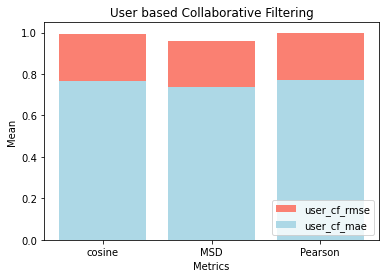

In [33]:
# (1) User based Collaborative Filtering
cu_rmse = cu_result['test_rmse'].mean()
cu_mae = cu_result['test_mae'].mean()

mu_rmse = mu_result['test_rmse'].mean()
mu_mae = mu_result['test_mae'].mean()

pu_rmse = pu_result['test_rmse'].mean()
pu_mae = pu_result['test_mae'].mean()

user_cf_rmse = [cu_rmse, mu_rmse, pu_rmse]
user_cf_mae = [cu_mae ,mu_mae, pu_mae]

x = ['cosine', 'MSD', 'Pearson']

plt.bar(x, user_cf_rmse, label="user_cf_rmse", color='salmon')
plt.bar(x, user_cf_mae, label="user_cf_mae",color='lightblue')

plt.title('User based Collaborative Filtering')
plt.xlabel('Metrics')
plt.ylabel('Mean')
plt.legend(loc='lower right', fontsize=10)
plt.show()

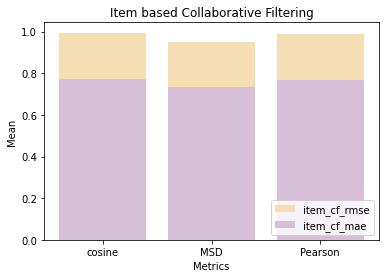

In [34]:
# (2) Item based Collaborative Filtering
ci_rmse = ci_result['test_rmse'].mean()
ci_mae = ci_result['test_mae'].mean()

mi_rmse = mi_result['test_rmse'].mean()
mi_mae = mi_result['test_mae'].mean()

pi_rmse = pi_result['test_rmse'].mean()
pi_mae = pi_result['test_mae'].mean()

item_cf_rmse = [ci_rmse, mi_rmse, pi_rmse]
item_cf_mae = [ci_mae ,mi_mae, pi_mae]

plt.bar(x, item_cf_rmse, label="item_cf_rmse", color='wheat')
plt.bar(x, item_cf_mae, label="item_cf_mae",color='thistle')

plt.title('Item based Collaborative Filtering')
plt.xlabel('Metrics')
plt.ylabel('Mean')
plt.legend(loc='lower right', fontsize=10)
plt.show()

6. Examine how the number of neighbors impacts the performances of User based Collaborative Filtering and Item based Collaborative Filtering? Plot your results. 

In [22]:
i=0
k_num = 20

mu_rmse = list()
mu_mae = list()

mi_rmse = list()
mi_mae = list()

for i in range(k_num):
    # MSD - User based Collaborative Filtering
    mu = KNNBasic(k=i, sim_options = {'name':'MSD', 'user_based':True })
    mu_result = cross_validate(mu, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
    mu_rmse.append(mu_result['test_rmse'].mean())
    mu_mae.append(mu_result['test_mae'].mean())
    
    # MSD - Item based Collaborative Filtering
    mi = KNNBasic(k=i, sim_options = {'name':'MSD', 'user_based':False })
    mi_result = cross_validate(mi, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
    mi_rmse.append(mi_result['test_rmse'].mean())
    mi_mae.append(mi_result['test_mae'].mean())

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0555  1.0568  1.0571  1.0525  1.0684  1.0581  0.0054  
MAE (testset)     0.8490  0.8464  0.8506  0.8460  0.8570  0.8498  0.0040  
Fit time          0.13    0.14    0.14    0.15    0.15    0.14    0.01    
Test time         0.52    0.43    0.54    0.46    0.44    0.48    0.04    
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing s

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9813  0.9906  0.9838  0.9894  0.9849  0.9860  0.0035  
MAE (testset)     0.7541  0.7551  0.7523  0.7571  0.7550  0.7547  0.0016  
Fit time          0.14    0.14    0.14    0.14    0.15    0.14    0.00    
Test time         0.70    0.70    0.81    0.71    0.81    0.74    0.05    
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s

Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9734  0.9811  0.9737  0.9770  0.9697  0.9750  0.0038  
MAE (testset)     0.7532  0.7602  0.7524  0.7559  0.7481  0.7540  0.0040  
Fit time          3.05    3.09    3.11    3.19    3.12    3.11    0.04    
Test time         3.81    3.94    3.87    3.93    3.84    3.88    0.05    
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd sim

Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9618  0.9508  0.9593  0.9574  0.9577  0.9574  0.0036  
MAE (testset)     0.7439  0.7335  0.7403  0.7438  0.7402  0.7403  0.0038  
Fit time          3.18    3.26    3.16    3.13    3.16    3.18    0.05    
Test time         4.09    4.29    4.06    4.14    4.13    4.14    0.08    
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  F

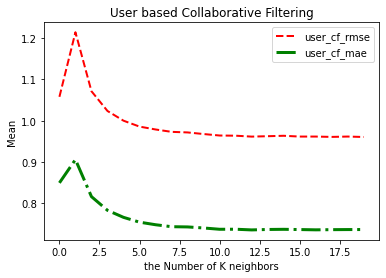

In [28]:
x = [x for x in range(k_num)]

plt.plot(x, mu_rmse, label="user_cf_rmse", linewidth=2.0,linestyle='--', color='red')
plt.plot(x, mu_mae, label="user_cf_mae",linewidth=3.0,linestyle='-.',color='green')

plt.title('User based Collaborative Filtering')
plt.xlabel('the Number of K neighbors')
plt.ylabel('Mean')
plt.legend(loc='upper right', fontsize=10)
plt.show()

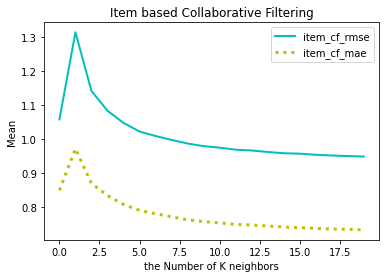

In [29]:
plt.plot(x, mi_rmse, label="item_cf_rmse",linewidth=2.0,linestyle='-', color='c')
plt.plot(x, mi_mae, label="item_cf_mae",linewidth=3.0,linestyle=':',color='y')

plt.title('Item based Collaborative Filtering')
plt.xlabel('the Number of K neighbors')
plt.ylabel('Mean')
plt.legend(loc='upper right', fontsize=10)
plt.show()

7. Identify the best number of neighbor (denoted by K) for User/Item based collaborative filtering in terms of RMSE. Is the best K of User based collaborative filtering the same with the best K of Item based collaborative filtering?

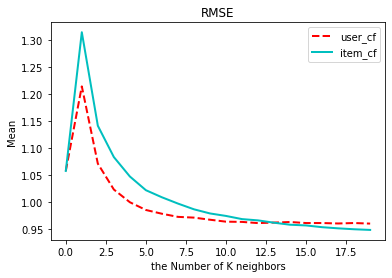

In [27]:
plt.plot(x, mu_rmse, label="user_cf", linewidth=2.0,linestyle='--', color='r')
plt.plot(x, mi_rmse, label="item_cf", linewidth=2.0,linestyle='-', color='c')


plt.title('RMSE')
plt.xlabel('the Number of K neighbors')
plt.ylabel('Mean')
plt.legend(loc='upper right', fontsize=10)
plt.show()